In [1]:
%matplotlib inline
from fastai.basics import *

In [2]:
n = 100

In [3]:
x = torch.ones(n, 2)
x[:, 0].uniform_(-1, 1)
x[:5]

tensor([[-0.0838,  1.0000],
        [-0.4505,  1.0000],
        [ 0.0611,  1.0000],
        [ 0.8579,  1.0000],
        [-0.3956,  1.0000]])

In [29]:
a = tensor(3., 2); a

tensor([3., 2.])

In [30]:
y = x@a + torch.rand(n)

In [31]:
y.shape

torch.Size([100])

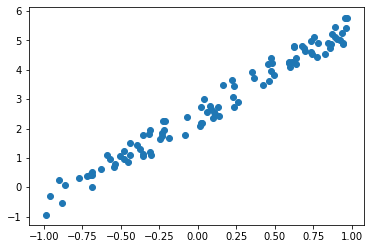

In [32]:
plt.scatter(x[:, 0], y)

In [37]:
def mse(y_hat, y):
    return ((y_hat-y)**2).mean()

In [59]:
a = torch.rand(2); a

tensor([0.3887, 0.5359])

In [60]:
y_hat = x@a
mse(y_hat, y)

tensor(7.3958)

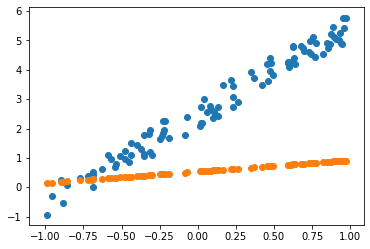

In [61]:
plt.scatter(x[:, 0], y)
plt.scatter(x[:, 0], y_hat)

In [62]:
a = nn.Parameter(a); a

Parameter containing:
tensor([0.3887, 0.5359], requires_grad=True)

In [63]:
def update():
    y_hat = x@a
    loss = mse(y_hat, y)
    if t % 10 == 0: print(loss)
    loss.backward()
    with torch.no_grad():
        a.sub_(lr * a.grad)
        a.grad.zero_()

In [64]:
lr = 1e-1
for t in range(100): update()

tensor(7.3958, grad_fn=<MeanBackward0>)
tensor(0.5644, grad_fn=<MeanBackward0>)
tensor(0.1946, grad_fn=<MeanBackward0>)
tensor(0.1105, grad_fn=<MeanBackward0>)
tensor(0.0881, grad_fn=<MeanBackward0>)
tensor(0.0820, grad_fn=<MeanBackward0>)
tensor(0.0804, grad_fn=<MeanBackward0>)
tensor(0.0800, grad_fn=<MeanBackward0>)
tensor(0.0799, grad_fn=<MeanBackward0>)
tensor(0.0799, grad_fn=<MeanBackward0>)


RuntimeError: Can't call numpy() on Variable that requires grad. Use var.detach().numpy() instead.

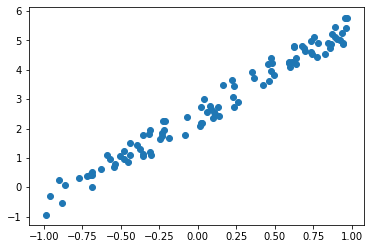

In [65]:
plt.scatter(x[:,0], y)
plt.scatter(x[:,0], x@a)